# MLS Tasks 2020

Slawomir Sowa<br>
G00375619@gmit.ie
***

### Task 1: Square root of 2 to 100 places
#### Description:

#### Research:

Square root of a number $x$ is a number $y$ that $ y^2 = x$. <em>[1]</em>

$$ y = \sqrt{x} $$
    
[1] Wikipedia; Square root; https://en.wikipedia.org/wiki/Square_root

In [1]:
# plot a chart of square root
import matplotlib.pyplot as plt
import numpy as np

# generate evenly spaced numbers between 0 and 10
x = np.linspace(0,10,500)

# using numby module sqrt calculate square root of generated numbers 
y = np.sqrt(x)

# adjust plot size 
plt.figure(figsize=(10,7))

# generate plot
plt.plot(x,y,label="Square root")
plt.plot([2,2],[0,3],":r")
plt.plot([0,4],[np.sqrt(2),np.sqrt(2)],":r")
plt.plot(2,np.sqrt(2),"ro",  markersize=6, label="$ \sqrt{2}$")


# add title and axes
plt.title("Square root chart",fontsize = 18 )
plt.xlabel("$x$",fontsize = 18)
plt.ylabel("$y = \sqrt{x}$",fontsize = 18)

# add text to plot
plt.text(0,1.5,"$aprox. 1.4..$", fontsize = 14)

# show legend
plt.legend()


The red marker on the chart is our topic for calculation. Our task is to calculate $\sqrt{2}$  to 100 decimal places.

I started by searching Google for methods to manually calculate the square root. I found a post on Quora <em>[2]</em> that describes many different methods, among others Newton's Method.<br>
Newton Method was described as
>Newton's method can get you a good estimate quickly, and if you were going to write a computer program to take the square root, Newton's method would be a good way to go.

Newton's Definition in wikipedia <em>[3]</em>:
>In numerical analysis, Newton's method, also known as the Newton–Raphson method, named after Isaac Newton and Joseph Raphson, is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function. 





[2] Quora; Methods to calculate square root ; https://www.quora.com/What-is-the-method-to-calculate-a-square-root-by-hand<br>
[3] Wikipedia; Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method


#### Calculations:

The method can be described by the formula <em>[3]</em>:
$$ x_{k+1} = x_{k}- \frac{f(x_{k})}{f'(x_{k})} $$

Using this formula we can calculate the approximate square root <em>[4]</em>.

$$ \sqrt{a} = x \Leftrightarrow a = x^2  \Leftrightarrow x^2 - a = 0 $$ 

Then:

$$ f(x) = x^2 - a $$

and derivative function:
$$ f'(x) = 2x $$

So now our equation is in the form:

$$ x_{k+1} = x_{k}- \frac{x_k^2 - a}{2x_k} $$
<br>

$$ x_{k+1} = \frac{1}{2}(x_k + \frac{a}{x_k})$$

Let's calculate the $\sqrt{2}$ manually.

Our $a=2$ and from the graph we can read that our point is close to $x_0 = 1.5$


$$x_1 = \frac{1}{2}(1.5 + \frac{2}{1.5}) \approx 1.416666$$ <br>

The next step is to take the result and use it to find a closer approximation to the root.<br>

$$x_2 = \frac{1}{2}(1.416666 + \frac{2}{1.416666}) \approx 1.414214$$

We could continue computing until we find a satisfactory approximation.

[4] Square Roots via Newton’s Method; S. G. Johnson, MIT Course February 4, 2015; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf


#### Create a square root to compare:

To be sure of the correctness of my calculations, I will compare my result with square root of 2 calculated by Decimal Python module.

The decimal module provides support for fast correctly-rounded decimal floating point arithmetic.<em>[5]</em>

[5] Python documentation; Numeric and Mathematical Modules; https://docs.python.org/3/library/decimal.html

In [57]:
# Generating a model to compare our calculations
from decimal import *

# set precision
getcontext().prec = 101

# calculate the square root to 100 decimal places  
decimal_sqrt_2 = Decimal(2).sqrt()

# calucated square root converted to string 
decimal_sqrt_2 = str(decimal_sqrt_2)

print("Python Decimal Result: " + decimal_sqrt_2)
print("Python Decimal Length: " + str(len(decimal_sqrt_2)))


Python Decimal Result: 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
Python Decimal Length: 102


#### My Answer Code: 

##### Attempt 1

In [59]:
# Calculate square root without any imported modules

# first attempt to solve problem using floating point numbers
def calc_sqrt(x): 
    ''' A function to calculate root of number 2 up to 100 decimal places 
        param : float or int : number to calculate square root 
        return : float : square root of x
    '''

    prec = 10**(-10) # set a precision 
    i =  x/2  # Initial guess for the square root z
    
    # Loop required precision is reached 
    while abs(x-i*i) > prec:
        # calculate better approximation
        i = (i + x/ i)/2
    # return square root of x     
    return i


In [72]:
root = format(calc_sqrt(2), ",.100f")
print("Calculated square root: ", root)

Calculated square root:  1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


In [73]:
# compare calculated square root to square root calculatef from Python Decimal

decimal_sqrt_2 == root

False

By reading python documentation <em>[6]</em> I know that using floating point with precision 100 decimal places will not work. 


[6] Python Documentation ; Floating Point Arithmetic: Issues and Limitations; https://docs.python.org/2/tutorial/floatingpoint.html


##### Attempt 2

In [64]:
# Code adapt from https://rosettacode.org/wiki/Integer_roots#Python

def sqrt_2(precision):
    '''Method to calculate square root of a number using large integers 
        param : int : the accuracy with which we want to calculate the square root
        return : str : the calculated square root as a large integer is formatted 
                        and converted into a string representing a floating point number
    '''
    
    
    prec = 2*100**precision # Set a precision as a large integer number holds 201 places
    
    x_1 = 1  # Set Starting Value 
    
    x_2 = (x_1 + prec // (x_1)) // 2 # calculate second step of aproximation  
    

    while x_1 != x_2:   # While loop repeats steps  of calculating x_1 and x_2 to get closer approximation
                        # when x is equal to y the loop stops,
                        # which indicates that we have calculated the root with the given precision
        x_1 = x_2    
        x_2 = (x_2 + prec // x_2) // 2 # calculates precision
    
    result = f'{x_2  // 10**100}.{x_2  % 10**100:0100d}'
    return result
 

In [65]:

root_2 = sqrt_2(100) # Function Call with precision 100
print(root_2)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [66]:
# compare calculated square root to square root calculatef from Python Decimal

decimal_sqrt_2 == root_2

True

#### Result

This task is to calculate square root without importing additional libraries to the nearest 100 decimal places. To solve the problem, I had to find an algorithm that would allow me to calculate the square root of any number with a pencil and a piece of paper. Another problem was that floating point variables were not able to hold value with 100 decimal places.
I used google search engine and found out that with such high precision it is necessary to use integers and then convert and store the results as a string.
I learned a step-by-step approach to solving the problem.


#### References

<em>[1].</em> Wikipedia; Square root; https://en.wikipedia.org/wiki/Square_root<br>
<em>[2].</em> Quora; Methods to calculate square root ; https://www.quora.com/What-is-the-method-to-calculate-a-square-root-by-hand<br>
<em>[3].</em> Wikipedia; Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method <br>
<em>[4].</em> Square Roots via Newton’s Method; S. G. Johnson, MIT Course February 4, 2015; https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf<br>
<em>[5].</em> Python documentation; Numeric and Mathematical Modules; https://docs.python.org/3/library/decimal.html<br>   
<em>[6].</em> Python Documentation ; Floating Point Arithmetic: Issues and Limitations; https://docs.python.org/2/tutorial/floatingpoint.html<br>

### Task 2: Chi Square

#### Description

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example,stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

#### Research

The Chi-square test of independence is used to determine if there is a significant relationship between two variables. For example, we could use a chi-square test to determine if the gender of the students is related to the choice of subjects. <em>[1]</em>
<br>
<br>
<em>[1].</em> "Chi-Square Test for Independence"; https://stattrek.com/chi-square-test/independence.aspx 

#### Create Dataframe

In [39]:
import pandas as pd

# Create data as a list of lists
chi_data = [[90, 60, 104, 95], 
            [30, 50, 51, 20], 
            [30, 40, 45, 35]]

# Create dataframe using pandas DataFrame method
df = pd.DataFrame(chi_data, # add data
                  index = ['White collar', 'Blue collar', 'No Collar'], # add indexes
                 columns = ["A","B","C","D"] # add columns 
                 )
df # print dataframe

,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No Collar,30,40,45,35


In [68]:
# importing chi2_contingency - function to compute the chi-square statistic ,p-value and Degree of freedom
# for the hypothesis test of independence
# [2]. scipy.stats.chi2_contingency; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

from scipy.stats import chi2_contingency

chi_2, p_val, degree_of_freedom, expected_values = chi2_contingency(df)

print(f"Chi Square: {round(chi_2,2)}")
print(f"P-Value: {round(p_val,8)}")
print(f"Degree of freedom: {degree_of_freedom}")


Chi Square: 24.57
P-Value: 0.00040984
Degree of freedom: 6


#### Checking for indpendence
Knowing the p-val, we can determine whether our sets of data are dependent or independent<br>

H0 : Two variables are independent - null hipotesis<br>
H1 : Two variables are dependent - alternative hipotesis<br>

In [71]:
# Checkig for independence
# [3]. https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

significance = 0.01 # set level of significance to 1%
print('p-value=%.8f, significance=%.2f\n' % (p_val, significance))

# if p_val is lower that level of significance H0 is rejected
if p_val < significance:
    print("""At %.2f level of significance, we reject the null hypotheses H0 and accept H1. 
They are dependent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses H0. 
They are independent.""" % (significance))

p-value=0.00040984, significance=0.01

At 0.01 level of significance, we reject the null hypotheses H0 and accept H1. 
They are dependent.


#### Result

This task allowed me to understand and learn about the principles of Chi Square for test of independence. This is a function from scipy.stats that determines whether data is dependent on each other. The Hypotesis Testing performed has shown that the data are dependent.

#### References

<em>[1].</em> "Chi-Square Test for Independence"; https://stattrek.com/chi-square-test/independence.aspx <br>
<em>[2].</em> "scipy.stats.chi2_contingency"   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html<br>
<em>[3].</em> "Gentle Introduction to Chi-Square Test for Independence"; https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

### Task 3: Standard Deviation

#### Description
The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x). However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

#### Research
###### Standard deviation 
###### STDEV.P 
<code>STDEV.P(number1,[number2],...)</code> this excel function calculates the standard deviation of the whole population given as argument to the function, using following formula <em>[1]</em>:
$$\sigma = \sqrt{\frac{\sum(x-\overline{x})^2}{n}}  $$



###### STDEV.S
<code>STDEV.S(number1,[number2],...)</code> Estimates standard deviation based on a sample of the population. STDEV.S uses the following formula:
$$s = \sqrt{\frac{\sum(x-\overline{x})^2}{(n-1)}}  $$

Used $(n-1)$ is knows as a Bessel's correction <em>[2]</em>

###### numpy.std
<code>numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=bool) </code> Numpy std function returns the calculated standard deviation, the standard deviation is computed for the flattened array by default, otherwise over the specified axis.

<code>Parameters</code><br>
<code>a </code> : array_like : Calculate the standard deviation of these values.

<code>axis</code> : None or int or tuple of ints, optional Axis or axes along which the standard deviation is computed. The default is to compute the standard deviation of the flattened array.


<code>dtype : dtype</code>, optional
Type to use in computing the standard deviation. For arrays of integer type the default is float64, for arrays of float types it is the same as the array type.

<code>out : ndarray</code>, optional
Alternative output array in which to place the result. It must have the same shape as the expected output but the type (of the calculated values) will be cast if necessary.

<code>ddof : int</code>, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.

<code>keepdims : bool</code>, optional
If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

If the default value is passed, then keepdims will not be passed through to the std method of sub-classes of ndarray, however any non-default value will be. If the sub-class’ method does not implement keepdims any exceptions will be raised.

<code>Returns</code> : standard_deviationndarray, see dtype parameter above.If out is None, return a new array containing the standard deviation, otherwise return a reference to the output array.
$$s = \sqrt{\frac{np.sum(x-np.mean(x))^2}{len(x)}}  $$

<em>[1].</em> Miscrosoft; STDEV.P function; https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285<br>
<em>[2].</em> Corrected sample standard deviation; https://en.wikipedia.org/wiki/Standard_deviation

#### Calculations


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Knowing the Excel formula for STDV.P and STDV. Let's create two functions that will simulate
# their behaviour

# create STDEV.P function
def stdev_p(x):
    sd = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
    return sd

# create STDEV.S function
def stdev_s(x):
    sd = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))
    return sd

In [22]:
# lets randomly generate data for simulation 

np.random.seed(5)

full_population = np.random.normal(0,5,100000)

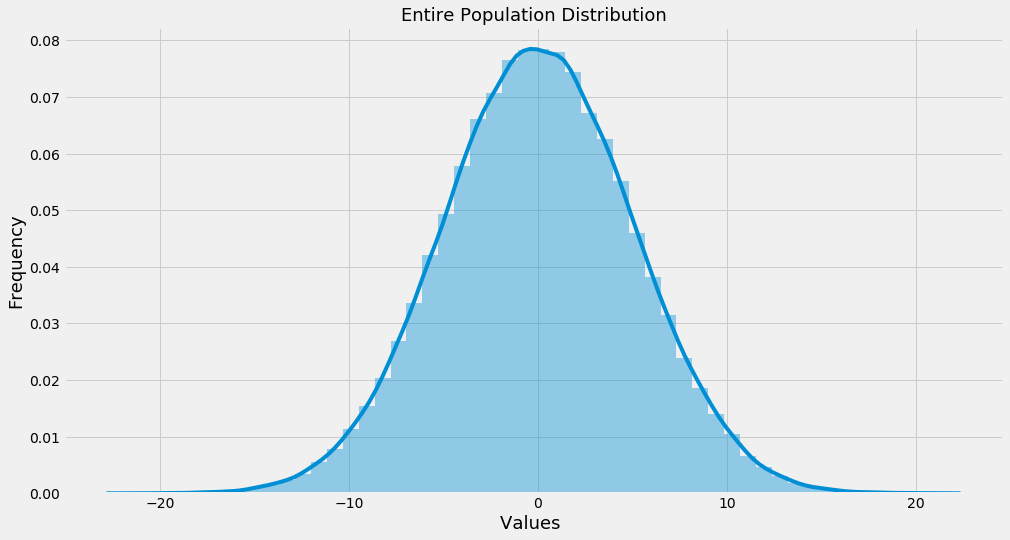

In [48]:
# set plot size
plt.figure(figsize=(15,8))

# create plot
sns.distplot(full_population)

# set labels and title
plt.xlabel('Values ', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Entire Population Distribution', fontsize = 18)

# show plot 
plt.show()